## **Descripcion e inicializacion del proyecto**

La crisis de la vivienda en los Países Bajos es uno de los mayores problemas a los que se enfrentan los residentes. Debido a múltiples factores, como el crecimiento de la población y la escasez de trabajadores de la construcción, la disponibilidad de viviendas ha disminuido significativamente. Medidas como la desgravación fiscal de las hipotecas para los compradores han contribuido a aumentar los precios, al igual que otras supuestamente destinadas a ayudar a los compradores jóvenes, pero que han acabado ayudando a los propietarios existentes a adquirir más propiedades. Esta disminución ha elevado los precios del alquiler a niveles altísimos, lo que ha llevado a muchos a preguntarse si se están aprovechando de ellos.

Para responder a esta inquietud, se proporcionara una solucion analitica para predecir el alquiler de una casa a partir de diferentes caracteristicas analizadas mas adelante.

El análisis de los datos elegidos está motivado por la necesidad de comprender mejor el mercado de alquiler de propiedades, identificar patrones y tendencias, y optimizar tanto la oferta como la demanda en este sector. Este análisis permitirá descubrir oportunidades para mejorar la experiencia de los inquilinos y propietarios, identificar áreas de alto crecimiento, y optimizar los precios de alquiler basados en diversas variables como la ubicación, características del inmueble, y condiciones de convivencia.

Ademas de la busqueda de hacer ver a Europa y los paises bajos como un lugar con estabilidad de vivienda y calidad de vida, evitando titulares como:


*   [*La crisis de la vivienda se extiende por toda Europa, pero la de Holanda está ya en otro nivel*](https://www.eldiario.es/internacional/theguardian/crisis-vivienda-extiende-europa-holanda-nivel_1_11345479.html)

*   [*La crisis de la vivienda en Países Bajos: una burbuja sin oxígeno*](https://www.swissinfo.ch/spa/la-crisis-de-la-vivienda-en-países-bajos-una-burbuja-sin-oxígeno/47342426)

* [*Refugiados y crisis de la vivienda, la tormenta perfecta en Países Bajos*](https://es.euronews.com/my-europe/2023/07/27/refugiados-y-crisis-de-la-vivienda-la-tormenta-perfecta-en-paises-bajos)

<br>

La audiencia que se beneficiará de este análisis incluye propietarios y administradores de propiedades, empresas de gestión inmobiliaria, potenciales inquilinos que buscan una propiedad adecuada a sus necesidades, y plataformas de alquiler que desean mejorar la precisión de sus recomendaciones y servicios. Además, inversores en bienes raíces también podrían utilizar este análisis para tomar decisiones informadas sobre dónde y en qué tipo de propiedades invertir.

### Preguntas de negocio

¿Que relacionen existen entre las diferentes variables que influyen en el costo total de una alquiler?

¿Podemos establecer la influencia de patrones o situaciones externas sobre el precio de las propiedades?

¿Cuales son las principales caracteristicas que hacen crecer o decrecer el precio de los alquileres?

¿Existen patrones de sobrecostos relacionados con una caracteristica especifica del lugar a arrendar?

## Conexion a la API y carga de datos

In [1]:
api_token={"username":"danielgongoragarcia","key":"51710779b70f16c389cbaf9c7eeb5b2b"}

In [2]:
!rm -rf /root/.kaggle.

In [3]:
!mkdir /root/.kaggle

In [4]:
import json
with open('/root/.kaggle/kaggle.json','w') as file:
    json.dump(api_token,file)

In [13]:
!kaggle competitions download -c fcg-2022-netherlands-accommodation-prices

 59% 10.0M/16.8M [00:00<00:00, 42.1MB/s]
100% 16.8M/16.8M [00:00<00:00, 66.3MB/s]


In [44]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

In [26]:
archivozip='/content/fcg-2022-netherlands-accommodation-prices.zip'

In [27]:
with zipfile.ZipFile(archivozip,'r') as zip_file:
  for nombre_archivo in zip_file.namelist():
    print(nombre_archivo)

sample_submission.csv
test.csv
train.csv


In [28]:
nombre_archivo='train.csv'

with zipfile.ZipFile(archivozip,'r') as zip_file:
  with zip_file.open(nombre_archivo) as csv:
    df=pd.read_csv(csv)

## EDA

In [36]:
df.head(3)

,id,title,city,postalCode,latitude,longitude,areaSqm,firstSeenAt,lastSeenAt,isRoomActive,...,living,pets,smokingInside,matchAge,matchGender,matchCapacity,matchLanguages,matchStatus,coverImageUrl,rent
0,0,West-Varkenoordseweg,Rotterdam,3074HN,51.896601,4.514993,14,2019-07-14 11:25:46.511000+00:00,2019-07-26 22:18:23.142000+00:00,True,...,NaN,No,No,16 years - 99 years,Not important,1 person,Not important,Not important,https://resources.kamernet.nl/image/913b4b03-5...,500
1,3,Ruiterakker,Assen,9407BG,53.013494,6.561012,16,2019-07-14 11:25:46.988000+00:00,2019-07-18 22:00:31.174000+00:00,False,...,NaN,No,Yes,18 years - 32 years,Female,1 person,Not important,"Student, Working student",https://resources.kamernet.nl/image/84e95365-6...,290
2,8,Brusselseweg,Maastricht,6217GX,50.860841,5.671673,16,2019-07-14 11:25:47.814000+00:00,2019-08-10 00:14:27.130000+00:00,True,...,NaN,No,No,16 years - 40 years,Male,4 persons,Dutch English,Student,https://resources.kamernet.nl/image/6e625591-d...,425


In [37]:
df.dtypes

,0
id,int64
title,object
city,object
postalCode,object
latitude,float64
longitude,float64
areaSqm,int64
firstSeenAt,object
lastSeenAt,object
isRoomActive,object


#### Analisis de variables categoricas




In [106]:
df_cat=df[[i for i in df.columns if i not in ['areaSqm','rent']]]

In [88]:
df_cat.columns

Index(['id', 'title', 'city', 'postalCode', 'latitude', 'longitude',
       'firstSeenAt', 'lastSeenAt', 'isRoomActive', 'rawAvailability',
       'postedAgo', 'descriptionNonTranslated', 'descriptionTranslated',
       'rentDetail', 'propertyType', 'furnish', 'energyLabel', 'gender',
       'internet', 'roommates', 'shower', 'toilet', 'kitchen', 'living',
       'pets', 'smokingInside', 'matchAge', 'matchGender', 'matchCapacity',
       'matchLanguages', 'matchStatus', 'coverImageUrl'],
      dtype='object')

Podemos eliminar las columnas que no se utilizaran, en este caso, unicamente la de coverImageUrl

In [89]:
df_cat.head(3)

,id,title,city,postalCode,latitude,longitude,firstSeenAt,lastSeenAt,isRoomActive,rawAvailability,...,kitchen,living,pets,smokingInside,matchAge,matchGender,matchCapacity,matchLanguages,matchStatus,coverImageUrl
0,0,West-Varkenoordseweg,Rotterdam,3074HN,51.896601,4.514993,2019-07-14 11:25:46.511000+00:00,2019-07-26 22:18:23.142000+00:00,True,26-06-'19 - Indefinite period,...,Shared,NaN,No,No,16 years - 99 years,Not important,1 person,Not important,Not important,https://resources.kamernet.nl/image/913b4b03-5...
1,3,Ruiterakker,Assen,9407BG,53.013494,6.561012,2019-07-14 11:25:46.988000+00:00,2019-07-18 22:00:31.174000+00:00,False,16-06-'19 - Indefinite period,...,Shared,NaN,No,Yes,18 years - 32 years,Female,1 person,Not important,"Student, Working student",https://resources.kamernet.nl/image/84e95365-6...
2,8,Brusselseweg,Maastricht,6217GX,50.860841,5.671673,2019-07-14 11:25:47.814000+00:00,2019-08-10 00:14:27.130000+00:00,True,15-07-'19 - Indefinite period,...,Shared,NaN,No,No,16 years - 40 years,Male,4 persons,Dutch English,Student,https://resources.kamernet.nl/image/6e625591-d...


In [107]:
df_cat['firstSeenAt']=df_cat['firstSeenAt'].apply(lambda x: x[:10])
df_cat['lastSeenAt']=df_cat['lastSeenAt'].apply(lambda x: x[:10])

<ipython-input-107-d996c17bb9c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['firstSeenAt']=df_cat['firstSeenAt'].apply(lambda x: x[:10])
<ipython-input-107-d996c17bb9c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['lastSeenAt']=df_cat['lastSeenAt'].apply(lambda x: x[:10])


In [108]:
df_cat['firstSeenAt']=pd.to_datetime(df_cat['firstSeenAt'])
df_cat['lastSeenAt']=pd.to_datetime(df_cat['lastSeenAt'])
df_cat['tiempo_publicacion']=df_cat['lastSeenAt']-df_cat['firstSeenAt']

<ipython-input-108-f3a68f46a814>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['firstSeenAt']=pd.to_datetime(df_cat['firstSeenAt'])
<ipython-input-108-f3a68f46a814>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['lastSeenAt']=pd.to_datetime(df_cat['lastSeenAt'])
<ipython-input-108-f3a68f46a814>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [109]:
df_cat['tiempo_publicacion'] = df_cat['tiempo_publicacion'].dt.days

<ipython-input-109-24dcfe767180>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['tiempo_publicacion'] = df_cat['tiempo_publicacion'].dt.days


In [110]:
df_cat.drop(columns=['coverImageUrl','firstSeenAt','lastSeenAt','postalCode','rawAvailability', 'postedAgo', ],inplace=True)

<ipython-input-110-ed58cb4f8132>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.drop(columns=['coverImageUrl','firstSeenAt','lastSeenAt','postalCode','rawAvailability', 'postedAgo', ],inplace=True)


In [111]:
df_cat_num=df_cat[['id','tiempo_publicacion']]

In [96]:
df_cat.set_index('id',inplace=True)

In [97]:
## Frecuencia absoluta y relativa
for i in df_cat.columns:
  print(f'Variable: {i}')
  print(df_cat[i].value_counts())
  print(df_cat[i].value_counts(normalize=True))
  print('\n')


Variable: title
title
Hoogstraat             99
Oldenzaalsestraat      84
Hoofdstraat            67
Friesestraatweg        65
Kerkstraat             65
                       ..
Archimedesstraat        1
Betjakstraat            1
Sutan Sjahrirstraat     1
Sabangstraat            1
Lange Herenvest         1
Name: count, Length: 7922, dtype: int64
title
Hoogstraat             0.003546
Oldenzaalsestraat      0.003009
Hoofdstraat            0.002400
Friesestraatweg        0.002328
Kerkstraat             0.002328
                         ...   
Archimedesstraat       0.000036
Betjakstraat           0.000036
Sutan Sjahrirstraat    0.000036
Sabangstraat           0.000036
Lange Herenvest        0.000036
Name: proportion, Length: 7922, dtype: float64


Variable: city
city
Amsterdam         4856
Groningen         3051
Rotterdam         2684
Enschede          1380
Den Haag          1315
                  ... 
Riel                 1
Plasmolen            1
Sprang-Capelle       1
Middelburg        

In [105]:
#@title Usaremos crosstab para identificar relaciones entre algunas variables categoricas identificadas

print(pd.crosstab(df_cat['gender'], df_cat['furnish']))
print("\n")
print(pd.crosstab(df_cat['gender'], df_cat['pets']))
print("\n")
print(pd.crosstab(df_cat['gender'], df_cat['smokingInside']))
print("\n")
print(pd.crosstab(df_cat['rentDetail'], df_cat['gender']))


furnish  Furnished  Uncarpeted  Unfurnished
gender                                     
Female        2167         563         1656
Male          2017         550         1327
Mixed         3382        1345         3150
Unknown       4727        1180         5101


pets     By mutual agreement    No  Yes
gender                                 
Female                    81  4154  152
Male                      58  3664  173
Mixed                    102  7535  243
Unknown                  890  9799  528


smokingInside    No  Not important  Yes
gender                                 
Female         3962            220  205
Male           3275            186  434
Mixed          6756            379  745
Unknown        9379           1095  743


gender           Female  Male  Mixed  Unknown
rentDetail                                   
Utilities incl.    3874  3351   6971     5536


Con esta funcion mas adelante trataremos los datos nulos y le daremos a la variable resultado un valor categorico para ajustar mejor los modelos de ML.

In [98]:
#Al tener copntexto de los datos vamos a resolver los problemas de nulos
def data_prep(df):
    df['rentDetail'].replace(np.nan, 'Non Utilities Incl.',inplace=True)
    df['furnish'].replace(np.nan,'Unfurnished',inplace=True)
    df['gender'].replace('Unknown','Mixed',inplace=True)
    df['internet'].replace('Unknown','No',inplace=True)
    for i in ['shower','toilet','living','kitchen']:
        df[i].replace('Unknown','Shared',inplace=True)
    df['smokingInside'].replace('Not Important','Yes',inplace=True)
    try:
        y=pd.qcut(df['rent'], 4, labels=[0,1,2,3], retbins=False, precision=3, duplicates='raise').values
    except :
        y=None
    pre_x=df[['areaSqm','rentDetail','propertyType','furnish','gender','internet','shower','toilet','kitchen','living','pets','smokingInside']]
    x=pd.get_dummies(pre_x,prefix_sep='_',
                columns=['rentDetail','propertyType','furnish','gender','internet','shower','toilet','kitchen','living','pets','smokingInside'],
                sparse=False, drop_first=True, dtype=None)
    return x,y

#### Analisis Numerico

Al id, latitud y longitud ser variables cuya numericidad se comprota diferente, no las tendremos en cuenta a la hora de hacer el analisis nume

In [112]:
df_numerico=df[['id','areaSqm','rent']]
df_num = pd.merge(df_numerico, df_cat_num, on='id', how='inner')

In [114]:
# Análisis Descriptivo de las variables numericas relevantes
#df_num.set_index('id',inplace=True)
df_num.describe()

,areaSqm,rent,tiempo_publicacion
count,27915.000000,27915.000000,27915.000000
mean,31.667240,669.505212,15.995450
std,29.727405,416.156758,18.856033
min,6.000000,1.000000,0.000000
25%,14.000000,395.000000,4.000000
50%,20.000000,550.000000,11.000000
75%,40.000000,800.000000,26.000000
max,600.000000,5999.000000,233.000000


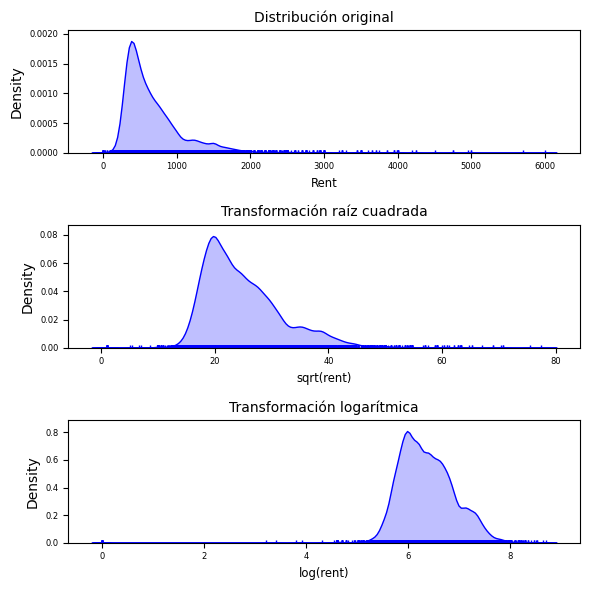

In [46]:
#@title Analisis variable resultado (rent)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.kdeplot(
    df.rent,
    fill    = True,
    color   = "blue",
    ax      = axes[0]
)
sns.rugplot(
    df.rent,
    color   = "blue",
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('Rent', fontsize='small')
axes[0].tick_params(labelsize = 6)

sns.kdeplot(
    np.sqrt(df.rent,),
    fill    = True,
    color   = "blue",
    ax      = axes[1]
)
sns.rugplot(
    np.sqrt(df.rent,),
    color   = "blue",
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(rent)', fontsize='small')
axes[1].tick_params(labelsize = 6)

sns.kdeplot(
    np.log(df.rent,),
    fill    = True,
    color   = "blue",
    ax      = axes[2]
)
sns.rugplot(
    np.log(df.rent,),
    color   = "blue",
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(rent)', fontsize='small')
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [47]:
# Simetria y Curtosis
print('Asimetria:',df['rent'].skew().round(2), '  Curtosis:', df['rent'].kurt().round(2))

Asimetria: 2.36   Curtosis: 10.36


La asimetría te dice si los datos están equilibrados alrededor de la media, mientras que la curtosis te informa sobre la presencia de valores extremos. Ambas son esenciales para evaluar la forma de la distribución de una variable y tomar decisiones informadas sobre el análisis y la modelización de los datos.

De los valores obtenidos podemos interpretar que:

**Curtosis positiva:** La distribución tiene colas más pesadas y un pico más alto que una distribución normal. Esto indica una mayor presencia de valores extremos o outliers.

**Asimetría positiva:** La cola derecha de la distribución es más larga o más pesada que la izquierda. Los valores tienden a estar más concentrados a la izquierda de la media.

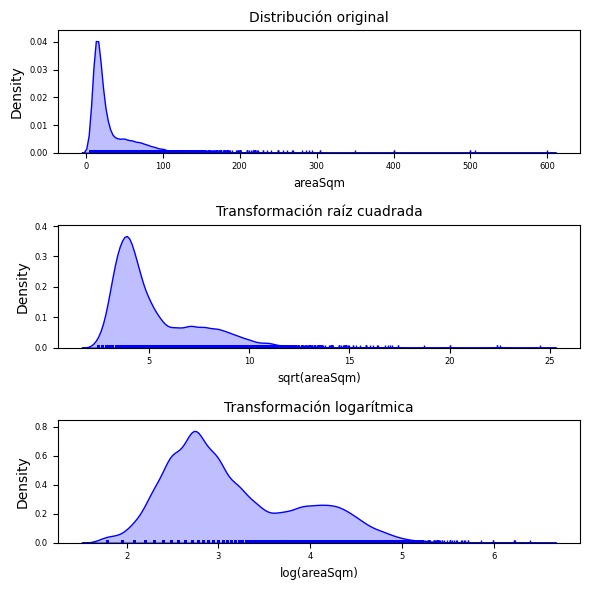

In [50]:
#@title Analisis variable (areaSqm)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.kdeplot(
    df.areaSqm,
    fill    = True,
    color   = "blue",
    ax      = axes[0]
)
sns.rugplot(
    df.areaSqm,
    color   = "blue",
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('areaSqm', fontsize='small')
axes[0].tick_params(labelsize = 6)

sns.kdeplot(
    np.sqrt(df.areaSqm,),
    fill    = True,
    color   = "blue",
    ax      = axes[1]
)
sns.rugplot(
    np.sqrt(df.areaSqm,),
    color   = "blue",
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(areaSqm)', fontsize='small')
axes[1].tick_params(labelsize = 6)

sns.kdeplot(
    np.log(df.areaSqm,),
    fill    = True,
    color   = "blue",
    ax      = axes[2]
)
sns.rugplot(
    np.log(df.areaSqm,),
    color   = "blue",
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(areaSqm)', fontsize='small')
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


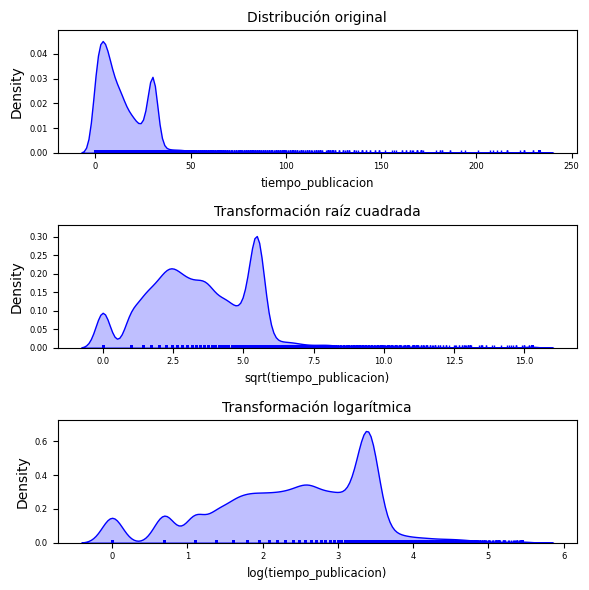

In [115]:
#@title Analisis variable (tiempo_publicacion)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.kdeplot(
    df_num.tiempo_publicacion,
    fill    = True,
    color   = "blue",
    ax      = axes[0]
)
sns.rugplot(
    df_num.tiempo_publicacion,
    color   = "blue",
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('tiempo_publicacion', fontsize='small')
axes[0].tick_params(labelsize = 6)

sns.kdeplot(
    np.sqrt(df_num.tiempo_publicacion,),
    fill    = True,
    color   = "blue",
    ax      = axes[1]
)
sns.rugplot(
    np.sqrt(df_num.tiempo_publicacion,),
    color   = "blue",
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(tiempo_publicacion)', fontsize='small')
axes[1].tick_params(labelsize = 6)

sns.kdeplot(
    np.log(df_num.tiempo_publicacion,),
    fill    = True,
    color   = "blue",
    ax      = axes[2]
)
sns.rugplot(
    np.log(df_num.tiempo_publicacion,),
    color   = "blue",
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(tiempo_publicacion)', fontsize='small')
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

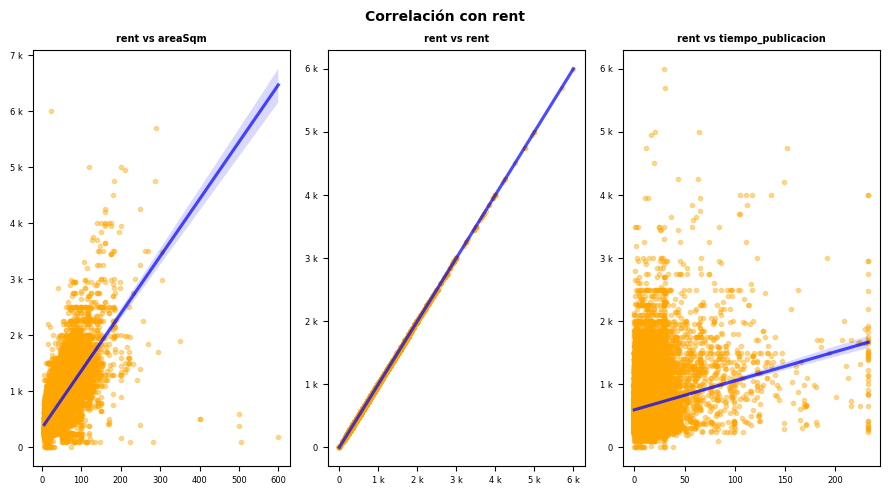

In [117]:
#@title Gráfico de distribución para cada variable numérica

# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 5))
axes = axes.flat

for i, colum in enumerate(df_num.columns):
    sns.regplot(
        x           = df_num[colum],
        y           = df_num['rent'],
        color       = "orange",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"b","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"rent vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con rent', fontsize = 10, fontweight = "bold");

Se observa una correlacion, sin embargo la presencia de outliers no se puede desconsiderar, por lo que se requerira del uso de las variables categoricas, el grafico de rent vs rent no tiene mucho sentido, sin embargo al ser una variable numerica, se uso.

In [118]:
df_num.corr()

,areaSqm,rent,tiempo_publicacion
areaSqm,1.000000,0.729018,0.226983
rent,0.729018,1.000000,0.208162
tiempo_publicacion,0.226983,0.208162,1.000000


Al darle numeros a la correlacion, encontramos un valor significativo, respondiendo a una de las preguntas, pudiendo decir que el precio del alquiler esta directamente relacionado a los metros cuadrados que tenga la propiedad, sin embargo los dias que dura la publicacion no parecen ser significativos